## Table of Contents

### 1. Introduction
    1.1 Data set description
    1.2 Project Objective
### 2. Setup and Data loading

### 3. Data cleaning and Feature Engineering
    3.1 Checking for missing data
    3.2 Data summary
    3.3 Feature Engineering

### 4. EDA
    4.1 Bivariate Analysis and Hypothesis Testing
    
### 5. Building Machine Learning Models
    5.1 Feature Engineering and Selection
    5.2 Decision Tree
    5.3 Random Forest
    5.4 Logisitic Regression
    5.5 Model Evaluation and Conclusion

## 1. Introduction

### 1.1 Data set description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

Attribute Information:

Listing of attributes: 

>50K, <=50K. 

#### i. Continuous Attributes

age: continuous.
    Age of an individual
    
education-num: number of education year, continuous.

Individual's year of receiving education

fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

#### ii. Categorical Attributes

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

### 1.2 Project Objective

    The goal of this project is to predict (classify) if a person makes over $50K or not given demographic data.

## 2. Setup and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import scipy.stats as st
from sklearn.feature_selection import chi2
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

Retrieve data from source

In [3]:
#urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 'income_1.csv')
#urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", 'income_2.csv')

Read data

In [4]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

In [5]:
data1 = pd.read_csv('income_1.csv', index_col=None, names=cols,)
data2 = pd.read_csv('income_2.csv', index_col=None, names=cols,)
data = pd.concat([data1, data2])
data = data.dropna()
print(data.shape)
data.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## 3. Data cleaning

### 3.1 Checking for missing values

Missing data were replaced with  " ?"

" ?" will be replace by np.nan

In [6]:
print(data['occupation'].unique())
data['workclass'].unique()

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
data = data.replace(' ?', np.nan)

Checking which column  has missing data

In [8]:
-data.count() + data.shape[0]

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
target               0
dtype: int64

Workclass, occupation and native country columns have missing data

Inspect data types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16281
Data columns (total 15 columns):
age               48842 non-null object
workclass         46043 non-null object
fnlwgt            48842 non-null float64
education         48842 non-null object
education-num     48842 non-null float64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null float64
capital-loss      48842 non-null float64
hours-per-week    48842 non-null float64
native-country    47985 non-null object
target            48842 non-null object
dtypes: float64(5), object(10)
memory usage: 6.0+ MB


In [10]:
data['age'] = data['age'].astype('int')

In [11]:
data.target.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [12]:
data['target'] = data['target'].str.replace('\.', '')

### 3.2. Data Summary


In [13]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,target
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


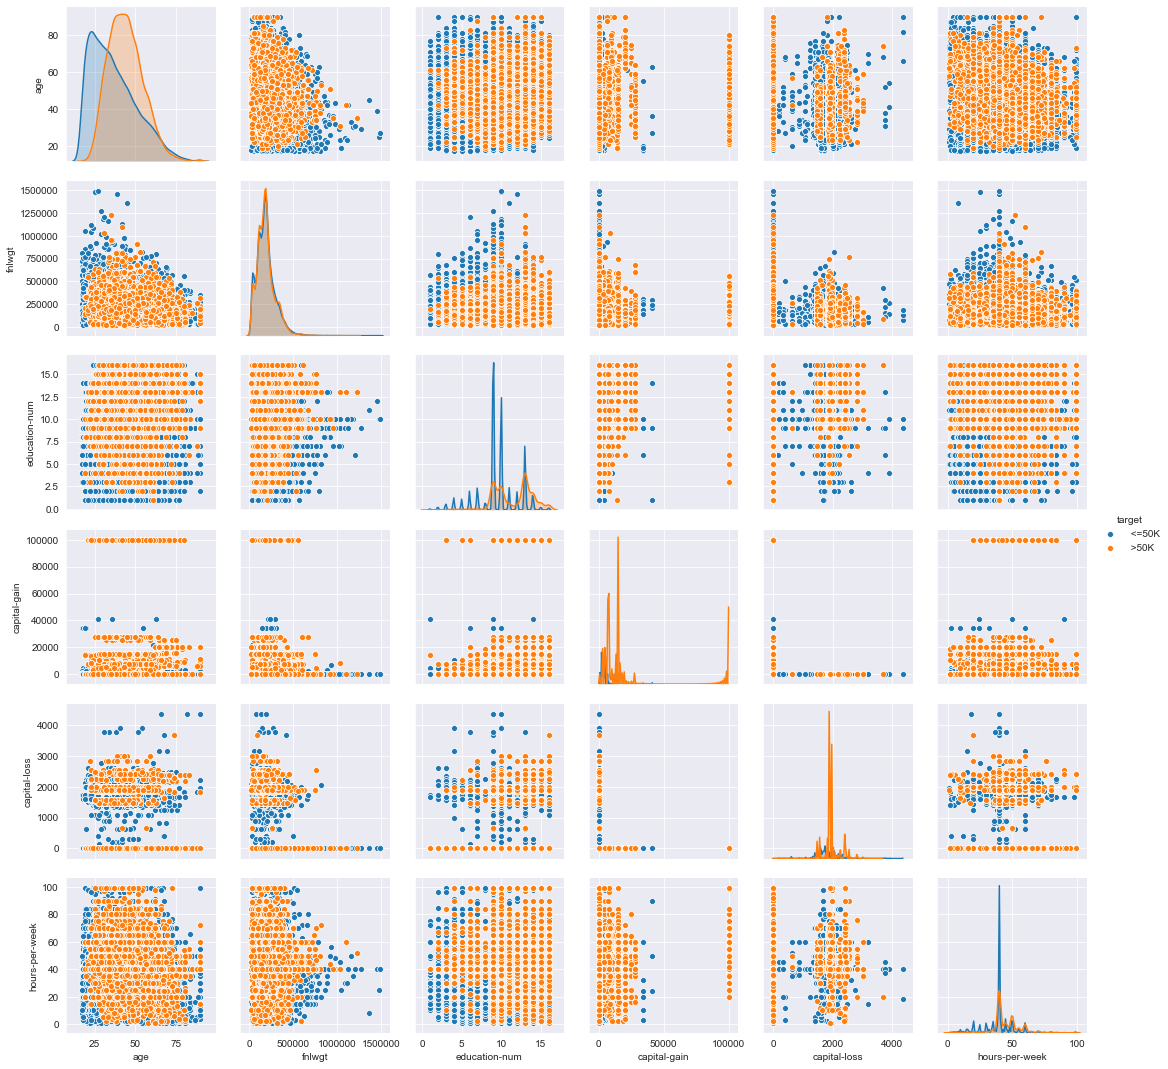

In [15]:
sns.pairplot(data=data, hue='target')

Quick glance shows the distribution of age is different for both income groups

### 3.3 Feature engineering

In [16]:
data_eng = data.copy()

In [17]:
# Replace blank with unknowns

In [18]:
data_eng['native-country'] = data_eng['native-country'].fillna('Unknown')
data_eng['workclass'] = data_eng['workclass'].fillna('Unknown')
data_eng['occupation'] = data_eng['occupation'].fillna('Unknown')
data_eng['native-country'] = data_eng['native-country'].str.lstrip()

In [19]:
cou = {'Region': {'Cambodia': 'Asia Pacific',
  'Canada': 'North America',
  'China': 'Asia Pacific',
  'Columbia': 'South America',
  'Cuba': 'South America',
  'Dominican-Republic': 'South America',
  'Ecuador': 'South America',
  'El-Salvador': 'South America',
  'England': 'Europe',
  'France': 'Europe',
  'Germany': 'Europe',
  'Greece': 'Europe',
  'Guatemala': 'South America',
  'Haiti': 'South America',
  'Holand-Netherlands': 'Europe',
  'Honduras': 'South America',
  'Hong': 'Asia Pacific',
  'Hungary': 'Europe',
  'India': 'Asia Pacific',
  'Iran': 'Middle East',
  'Ireland': 'Europe',
  'Italy': 'Europe',
  'Jamaica': 'South America',
  'Japan': 'Asia Pacific',
  'Laos': 'Asia Pacific',
  'Mexico': 'North America',
  'Nicaragua': 'South America',
  'Outlying-US(Guam-USVI-etc)': 'US Islands',
  'Peru': 'South America',
  'Philippines': 'Asia Pacific',
  'Poland': 'Europe',
  'Portugal': 'Europe',
  'Puerto-Rico': 'South America',
  'Scotland': 'Europe',
  'South': 'Unknown',
  'Taiwan': 'Asia Pacific',
  'Thailand': 'Asia Pacific',
  'Trinadad&Tobago': 'South America',
  'United-States': 'United-States',
  'Unknown': 'Unknown',
  'Vietnam': 'Asia Pacific',
  'Yugoslavia': 'Europe'}}
region = pd.DataFrame.from_dict(cou)
region = region.reset_index()
region = region.rename(index=str, columns={'index': 'native-country'})

In [20]:
#country = pd.read_excel('country.xlsx')
#country.head()


data_eng = data_eng.merge(region, how='left')
data_eng.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,Region
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,United-States
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,United-States
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,United-States
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,United-States
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,South America


##### Age (Binning Age)

In [21]:
# Bin age
age_bin = pd.interval_range(15, 90, 15)
data_eng['age_bins'] = pd.cut(data_eng['age'], age_bin)

#### Create new feature net_capital

In [22]:
data_eng['net_capital'] = data_eng['capital-loss'] + data_eng['capital-gain']


## 4. EDA

In the section exploration of how each feature affects income and hypothesis testing of features is carried out

The hypothesis testing is done using chi-squared and t-test

#### Helper functions for data explorations

In [23]:
def plot_stack(colname, dataframe):
    df = dataframe.copy()
    df['counter'] = 1
    df = df.groupby([colname,'target']).agg({'counter': 'count'}).reset_index()
    df = df.pivot(index=colname, columns='target', values='counter').reset_index()
    fig, ax = plt.subplots(figsize=(13,6))
    df.plot(x=colname, kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Count')

In [24]:
def plot_box(colname, dataframe):
    df = dataframe.copy()
    
    fig, ax = plt.subplots(figsize=(13,6))
    sns.boxplot(x='target', y=colname, data=df)

In [25]:
def chi_test(colname, dataframe):
    print("H0 (Null Hypothesis) : There is no relationship between {} and income.".format(colname))
    print("H1(Alternate Hypothesis) : There is a relationship between {} and income".format(colname), '\n')
    df = dataframe.copy()
    N = df.shape[0]
    df_test = pd.crosstab(df[colname], df['target'])
    chi_stat, p, df, expected = st.chi2_contingency(df_test.values)
    print(r"χ²({}, N={})={},".format(df, N, chi_stat), "p={}".format(p), '\n')
    if p > 0.05:
        print("We accept the null hypothesis at pvalue = 0.5")
    else:
        print("We reject the null hypothesis at pvalue = 0.5")

In [26]:
def t_test(colname, dataframe):
    print("H0 (Null Hypothesis) : There is no signifcant differnce in {} between income >=50K vs <50K.".format(colname))
    print("H1(Alternate Hypothesis) : There is signifcant differnce in {} between income >=50K vs <50K.".format(colname), '\n')
    df = dataframe.copy()
    dof = df.shape[0] - 2
    a = df[df['target']==' <=50K'][colname]
    Ma = a.shape[0]
    Masd = np.round(a.std(),2)
    b = df[df['target']==' >50K'][colname]
    Mb = b.shape[0]
    Mbsd = np.round(b.std(), 2)
    
    # Unequal variance used due to difference in sample size
    tval, p = st.ttest_ind(a, b, equal_var=False)
    print(r"income >=50K (M={}, SD={}) vs <50K (M={}, SD={})".format(Ma, Masd, Mb, Mbsd), '\n')
    print("t=({})= {}, p={}".format(dof, round(tval, 2), round(p, 2)), '\n')
    if p > 0.05:
        print("We accept the null hypothesis at pvalue = 0.5")
    else:
        print("We reject the null hypothesis at pvalue = 0.5")
        print(Masd)
   

### 4.1 Bivariate Analysis

Visualize and perform hypothesis test (t-Test or chi-squared test for independence )

#### Age

H0 (Null Hypothesis) : There is no relationship between age_bins and income.
H1(Alternate Hypothesis) : There is a relationship between age_bins and income 

χ²(14, N=48842)=5013.693991707985, p=0.0 

We reject the null hypothesis at pvalue = 0.5


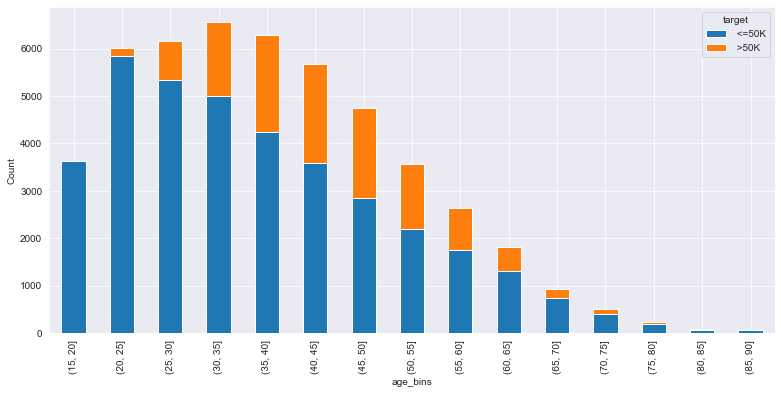

In [27]:
plot_stack('age_bins', data_eng)
chi_test('age_bins', data_eng)

#### Gender

H0 (Null Hypothesis) : There is no relationship between sex and income.
H1(Alternate Hypothesis) : There is a relationship between sex and income 

χ²(1, N=48842)=2248.847679013691, p=0.0 

We reject the null hypothesis at pvalue = 0.5


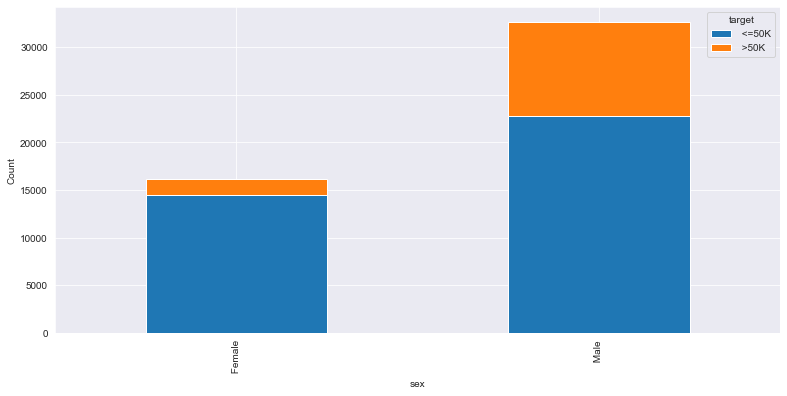

In [28]:
plot_stack('sex', data_eng)
chi_test('sex', data_eng)

#### Marital Status

H0 (Null Hypothesis) : There is no relationship between marital-status and income.
H1(Alternate Hypothesis) : There is a relationship between marital-status and income 

χ²(6, N=48842)=9816.015037266438, p=0.0 

We reject the null hypothesis at pvalue = 0.5


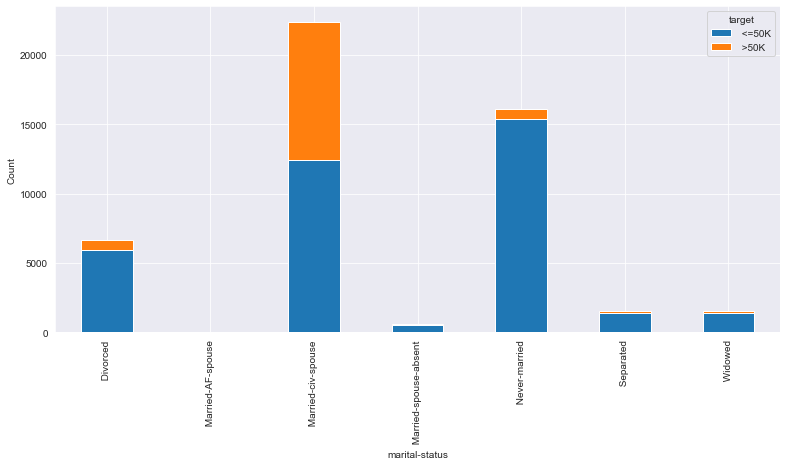

In [29]:
plot_stack('marital-status', data_eng)
chi_test('marital-status', data_eng)

#### Relationship

H0 (Null Hypothesis) : There is no relationship between relationship and income.
H1(Alternate Hypothesis) : There is a relationship between relationship and income 

χ²(5, N=48842)=10088.722490152224, p=0.0 

We reject the null hypothesis at pvalue = 0.5


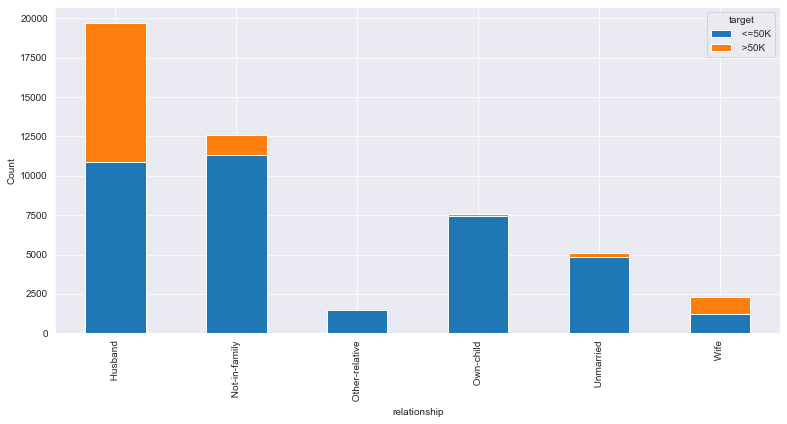

In [30]:
plot_stack('relationship', data_eng)
chi_test('relationship', data_eng)

#### education-num

H0 (Null Hypothesis) : There is no relationship between education-num and income.
H1(Alternate Hypothesis) : There is a relationship between education-num and income 

χ²(15, N=48842)=6537.972961360963, p=0.0 

We reject the null hypothesis at pvalue = 0.5


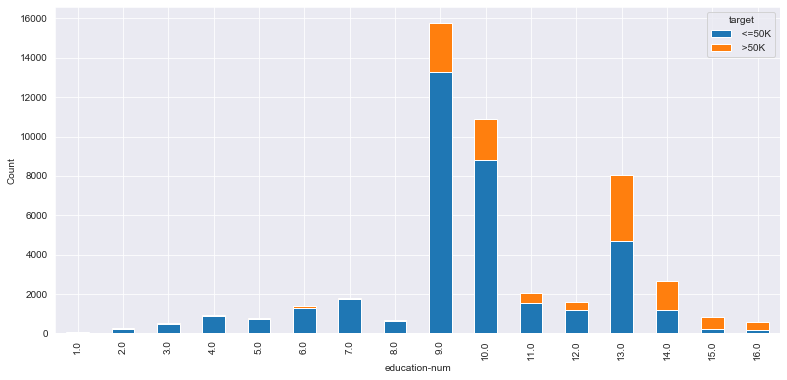

In [31]:
plot_stack('education-num', data_eng)
chi_test('education-num', data_eng)

#### Race

H0 (Null Hypothesis) : There is no relationship between race and income.
H1(Alternate Hypothesis) : There is a relationship between race and income 

χ²(4, N=48842)=487.026286837627, p=4.284377710223499e-104 

We reject the null hypothesis at pvalue = 0.5


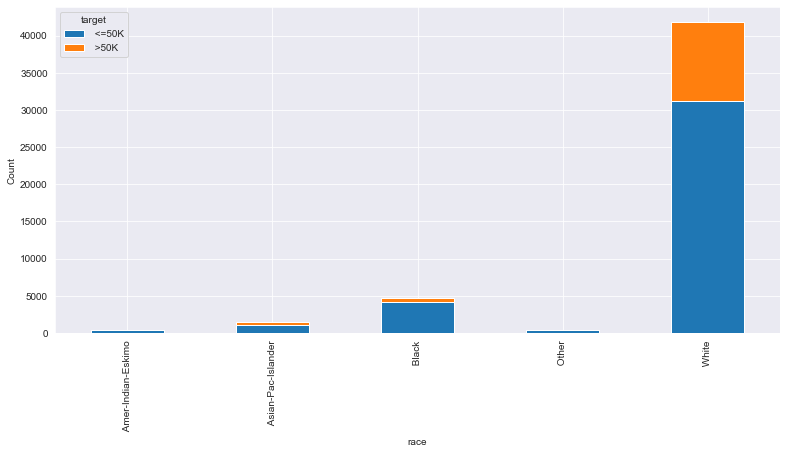

In [32]:
plot_stack('race', data_eng)
chi_test('race', data_eng)

#### fnlwgt

H0 (Null Hypothesis) : There is no signifcant differnce in fnlwgt between income >=50K vs <50K.
H1(Alternate Hypothesis) : There is signifcant differnce in fnlwgt between income >=50K vs <50K. 

income >=50K (M=37155, SD=106577.6) vs <50K (M=11687, SD=102442.73) 

t=(48840)= 1.43, p=0.15 

We accept the null hypothesis at pvalue = 0.5


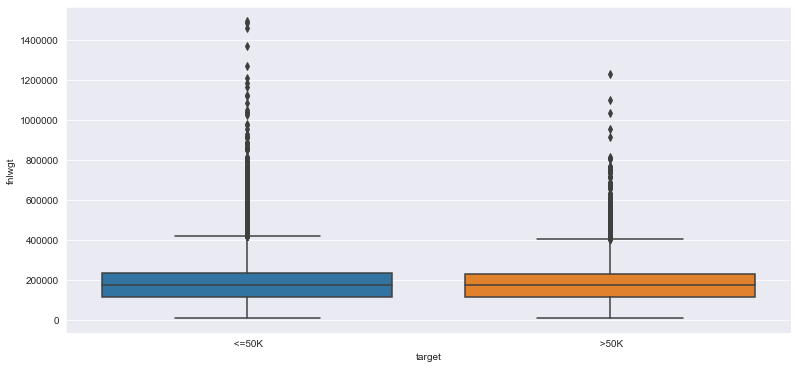

In [33]:
t_test('fnlwgt', data_eng)
plot_box('fnlwgt', data_eng)

#### hours-per-week

H0 (Null Hypothesis) : There is no signifcant differnce in hours-per-week between income >=50K vs <50K.
H1(Alternate Hypothesis) : There is signifcant differnce in hours-per-week between income >=50K vs <50K. 

income >=50K (M=37155, SD=12.36) vs <50K (M=11687, SD=11.09) 

t=(48840)= -54.66, p=0.0 

We reject the null hypothesis at pvalue = 0.5
12.36


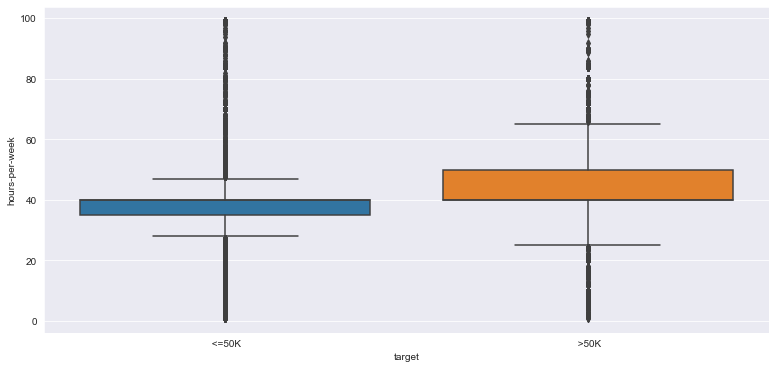

In [34]:
t_test('hours-per-week', data_eng)
plot_box('hours-per-week', data_eng)

#### Net_capital (Capital gain +  Capital loss)

H0 (Null Hypothesis) : There is no signifcant differnce in net_capital between income >=50K vs <50K.
H1(Alternate Hypothesis) : There is signifcant differnce in net_capital between income >=50K vs <50K. 

income >=50K (M=37155, SD=979.67) vs <50K (M=11687, SD=14715.62) 

t=(48840)= -29.62, p=0.0 

We reject the null hypothesis at pvalue = 0.5
979.67


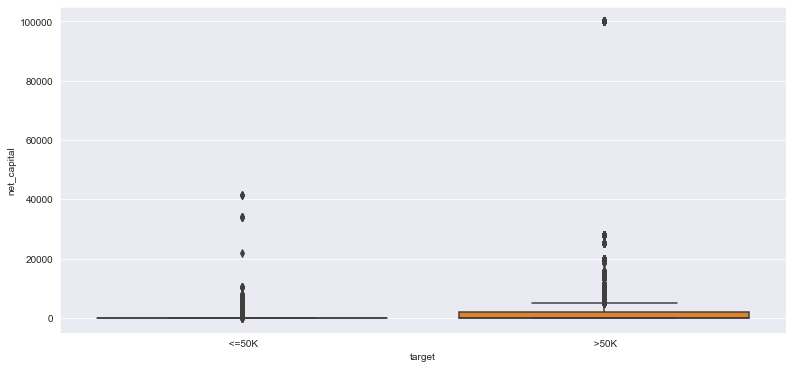

In [35]:
t_test('net_capital', data_eng)
plot_box('net_capital', data_eng)

#### native country

H0 (Null Hypothesis) : There is no relationship between Region and income.
H1(Alternate Hypothesis) : There is a relationship between Region and income 

χ²(7, N=48842)=281.6868438309417, p=4.903050959603616e-57 

We reject the null hypothesis at pvalue = 0.5


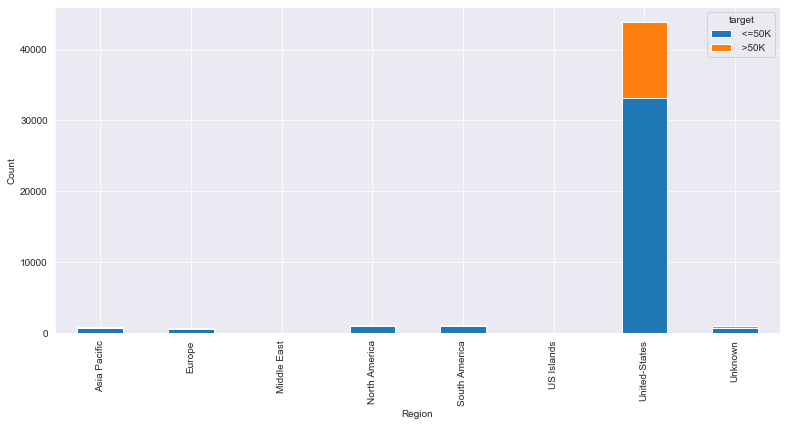

In [36]:
plot_stack('Region', data_eng)
chi_test('Region', data_eng)

#### workclass

H0 (Null Hypothesis) : There is no relationship between workclass and income.
H1(Alternate Hypothesis) : There is a relationship between workclass and income 

χ²(8, N=48842)=1610.7523748477367, p=0.0 

We reject the null hypothesis at pvalue = 0.5


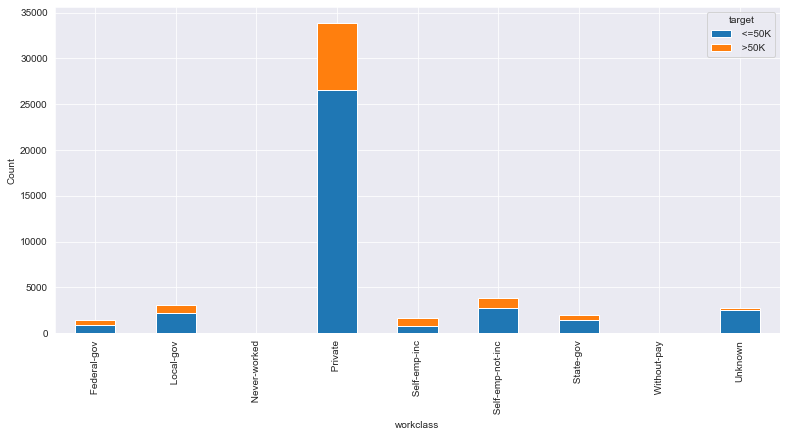

In [37]:
plot_stack('workclass', data_eng)
chi_test('workclass', data_eng)

#### occupation

H0 (Null Hypothesis) : There is no relationship between occupation and income.
H1(Alternate Hypothesis) : There is a relationship between occupation and income 

χ²(14, N=48842)=5983.163852487416, p=0.0 

We reject the null hypothesis at pvalue = 0.5


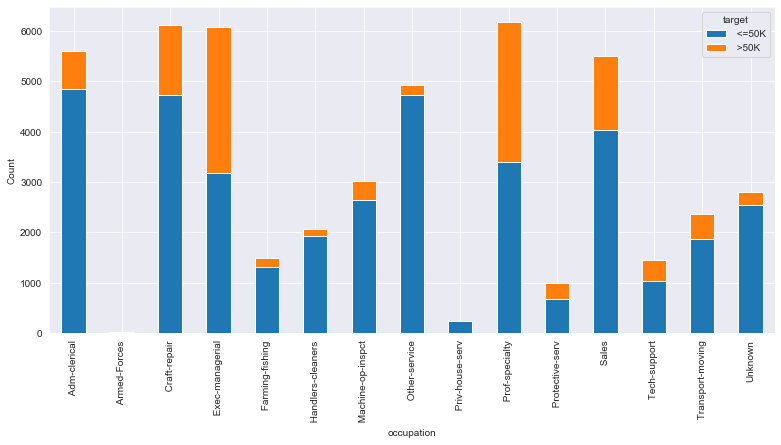

In [38]:
plot_stack('occupation', data_eng)
chi_test('occupation', data_eng)

## 5. Building Machine Learning Models

Features are selected based on the results from the bivariate analysis and hypothesis test performed in the EDA section

In [39]:
# Function to plot confusion matrix
def plot_confusion(conf_mat, label_name):
    sns.heatmap(conf_mat.T, square=False, annot=True, fmt='d', cbar=False,
                xticklabels=label_name, yticklabels=label_name, annot_kws={"size": 16, "horizontalalignment" :'center',
        "verticalalignment" :'center'})
    plt.xlabel('true label')
    plt.ylabel('predicted label')


### 5.1 Feature selection and Transformation

In [40]:
features = [ 'workclass', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'Region', 'age_bins', 'net_capital', 'hours-per-week']
X = data_eng[features[:-2]]
enc = OrdinalEncoder()
enc.fit(X)
X_cat = enc.transform(X)
X_con = data_eng[features[-2:]].values
X_all = np.append(X_cat, X_con, axis=1)
Y = data_eng[['target']]
Xtrain, Xtest, ytrain, ytest =  train_test_split(X_all, Y, random_state=44, test_size=0.3)

### 5.2 Decision Tree

#### Implementing a grid search to find best parameters

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
parameters = {'min_samples_split': [2, 10, 20, 50, 100, 500], 'min_samples_leaf': [2, 10, 20, 50, 100, 500]}
grid_search_dtree = GridSearchCV(dtree, parameters, cv=5, scoring='accuracy')
grid_search_dtree.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [2, 10, 20, 50, 100, 500],
                         'min_samples_split': [2, 10, 20, 50, 10

In [43]:
print("Model parameters {}".format(grid_search_dtree.best_params_), '\n')
print("The accuracy of the Decision tree model on \
training data is {}%".format( np.round(100*grid_search_dtree.best_score_ , 2)))

Model parameters {'min_samples_leaf': 50, 'min_samples_split': 20} 

The accuracy of the Decision tree model on training data is 85.67%


In [44]:
print("The accuracy of the Decision tree model on \
train data is {}%".format( np.round(100*grid_search_dtree.score(Xtest, ytest) , 2)))

The accuracy of the Decision tree model on train data is 85.34%


In [45]:
#conf = confusion_matrix(ytest, grid_search.predict(Xtest), )
#plot_confusion(conf, ['<=50K', '>50K'])

### 5.3 Random Forest

#### Grid search RandomForest

In [46]:
randomforest = RandomForestClassifier()

In [54]:
parameters = {'n_estimators': [10, 20, 50, 100], 'min_samples_split': [2, 10, 20, 50, 100, 500], 
              'min_samples_leaf': [2, 10, 20, 50, 100, 500]}
grid_search_RF = GridSearchCV(randomforest, parameters, cv=5, scoring='accuracy')
grid_search_RF.fit(Xtrain, ytrain.values.reshape(len(ytrain)),)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [55]:
print("Model parameters {}".format(grid_search_RF.best_params_), '\n')
print("Random Forest accuracy model on \
training data is {}%".format( np.round(100*grid_search_RF.best_score_ , 2)))

Model parameters {'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 100} 

Random Forest accuracy model on training data is 86.4%


In [56]:
print("Random Forest accuracy on \
test data is {}%".format( np.round(100*grid_search_RF.score(Xtest, ytest) , 2)))

Random Forest accuracy on test data is 86.26%


### 5.4 Logistic Regression

#### Grid search Logistic Regression

In [57]:
logreg = LogisticRegression(solver='liblinear')
parms_logreg = {"C": np.logspace(-4,4,9), "penalty": ['l1', 'l2']}
grid_log_reg = GridSearchCV(logreg, parms_logreg, cv=5)

grid_log_reg.fit(Xtrain, ytrain.values.reshape(len(ytrain)),)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
print("Model parameters {}".format(grid_log_reg.best_params_), '\n')
print("Logistic Regression accuracy model on \
training data is {}%".format( np.round(100*grid_log_reg.best_score_ , 2)))

Model parameters {'C': 1000.0, 'penalty': 'l2'} 

Logistic Regression accuracy model on training data is 82.55%


In [59]:
print("Logistic accuracy on \
test data is {}%".format( np.round(100*grid_log_reg.score(Xtest, ytest) , 2)))

Logistic accuracy on test data is 82.6%


### 5.5 Model Evaluation and Conclusion

### Model evaluation (ROC Curve)

array([' <=50K', ' >50K'], dtype=object)

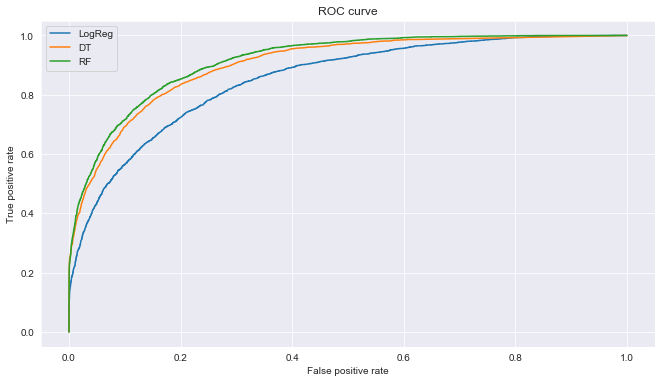

In [60]:
ypred_lg = grid_log_reg.predict_proba(Xtest)[:, 1]

ypred_rf = grid_search_RF.predict_proba(Xtest)[:, 1]

ypred_dt = grid_search_dtree.predict_proba(Xtest)[:, 1]



y_enc = OrdinalEncoder()
y_enc.fit(ytest)
yt = y_enc.transform(ytest)

fig, ax =  plt.subplots(figsize=(11,6))

# Logistic Regression
fpr_lg, tpr_lg, _ = roc_curve(yt, ypred_lg)
plt.plot(fpr_lg, tpr_lg, label='LogReg')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(yt, ypred_dt)
plt.plot(fpr_dt, tpr_dt, label='DT')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(yt, ypred_rf)
plt.plot(fpr_rf, tpr_rf, label='RF')




plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

ytest['target'].unique()

### Conclusion

The Random forest (86.3%) performs better than the decision tree (85.3%) and logisitic regression (82.6%) model.

The Random forest model performs better in predicting less false positives

In [ ]:
conf_dtree = confusion_matrix(ytest, grid_search_dtree.predict(Xtest))
conf_RF = confusion_matrix(ytest, grid_search_RF.predict(Xtest))
conf_lr = confusion_matrix(ytest, grid_log_reg.predict(Xtest))


plot_confusion(conf_dtree, ['<=50K', '>50K'])
plt.savefig('Images/dtree_conf_mat.png')

plot_confusion(conf_RF, ['<=50K', '>50K'])
plt.savefig('Images/RF_conf_mat.png')

plot_confusion(conf_lr, ['<=50K', '>50K'])
plt.savefig('Images/lr_conf_mat.png')